In [29]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
from scipy import stats

res = pd.read_table("C:/Users/416et/Desktop/real-estate-sample-1200.txt")

In [12]:
print(res.shape)
res.head()

(1200, 13)


,Sale Price,Lot Size,Waterfront,Age,Central Air,Fuel Type,Condition,Living Area,Pct College,Full Baths,Half Baths,Bedrooms,Fireplaces
0,320000,0.61,No,6,Yes,Oil,3,2492,64,2,1,4,1
1,215000,0.63,No,21,Yes,Gas,3,1792,64,1,1,3,0
2,125000,0.35,No,22,No,Gas,3,1040,63,1,0,3,0
3,158900,0.21,No,3,No,Oil,3,1292,52,2,0,3,1
4,82000,0.17,No,21,No,Oil,2,1412,57,2,1,2,0


In [13]:
price=res['Sale Price'];
res['lprice']=np.log(price)
res.head()

,Sale Price,Lot Size,Waterfront,Age,Central Air,Fuel Type,Condition,Living Area,Pct College,Full Baths,Half Baths,Bedrooms,Fireplaces,lprice
0,320000,0.61,No,6,Yes,Oil,3,2492,64,2,1,4,1,12.676076
1,215000,0.63,No,21,Yes,Gas,3,1792,64,1,1,3,0,12.278393
2,125000,0.35,No,22,No,Gas,3,1040,63,1,0,3,0,11.736069
3,158900,0.21,No,3,No,Oil,3,1292,52,2,0,3,1,11.976030
4,82000,0.17,No,21,No,Oil,2,1412,57,2,1,2,0,11.314475


In [68]:
lprice = res.iloc[:,-1]

In [17]:
ca = res.loc[res['Central Air']=='Yes']
print(ca.shape)
ca.head()

(485, 14)


,Sale Price,Lot Size,Waterfront,Age,Central Air,Fuel Type,Condition,Living Area,Pct College,Full Baths,Half Baths,Bedrooms,Fireplaces,lprice
0,320000,0.61,No,6,Yes,Oil,3,2492,64,2,1,4,1,12.676076
1,215000,0.63,No,21,Yes,Gas,3,1792,64,1,1,3,0,12.278393
9,264900,0.55,No,16,Yes,Oil,3,1897,63,2,1,4,1,12.487108
12,164700,0.16,No,25,Yes,Oil,3,1602,54,1,1,2,1,12.011881
16,437339,1.11,No,1,Yes,Oil,3,2645,62,2,1,3,1,12.988464


In [18]:
nca = res.loc[res['Central Air']=='No']
print(nca.shape)
nca.head()

(715, 14)


,Sale Price,Lot Size,Waterfront,Age,Central Air,Fuel Type,Condition,Living Area,Pct College,Full Baths,Half Baths,Bedrooms,Fireplaces,lprice
2,125000,0.35,No,22,No,Gas,3,1040,63,1,0,3,0,11.736069
3,158900,0.21,No,3,No,Oil,3,1292,52,2,0,3,1,11.976030
4,82000,0.17,No,21,No,Oil,2,1412,57,2,1,2,0,11.314475
5,219200,1.08,No,30,No,Oil,3,1735,61,1,1,4,1,12.297740
6,125000,0.16,No,133,No,Oil,2,852,57,1,1,2,0,11.736069


In [19]:
caPrice = ca['lprice']
caPrice.head()

0     12.676076
1     12.278393
9     12.487108
12    12.011881
16    12.988464
Name: lprice, dtype: float64

In [20]:
ncaPrice = nca['lprice']
ncaPrice.head()

2    11.736069
3    11.976030
4    11.314475
5    12.297740
6    11.736069
Name: lprice, dtype: float64

In [22]:
caPrice.describe()

count    485.000000
mean      12.451584
std        0.424524
min       11.316911
25%       12.154779
50%       12.458775
75%       12.724866
max       13.959611
Name: lprice, dtype: float64

In [23]:
ncaPrice.describe()

count    715.000000
mean      12.052412
std        0.438649
min       10.221941
25%       11.775290
50%       12.058153
75%       12.323856
max       13.687677
Name: lprice, dtype: float64

In [130]:
list=[]
def pt(caPrice, ncaPrice):
    n = len(caPrice)
    p_val = 0
    lprice = np.concatenate([caPrice, ncaPrice])
    for j in range(10000):
        np.random.shuffle(lprice)
        x = np.mean(lprice[:n]) - np.mean(lprice[n:])
        list.append(x)
        if(x< np.mean(ncaPrice) - np.mean(caPrice)):
            p_val = p_val +1
    print('p value is ', p_val / 10000)

In [131]:
pt(caPrice,ncaPrice)

p value is  0.0


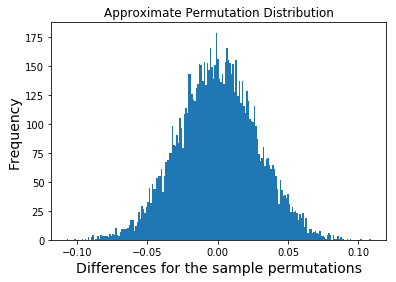

In [143]:
plt.hist(list,bins=200)
plt.xlabel('Differences for the sample permutations',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.title('Approximate Permutation Distribution');

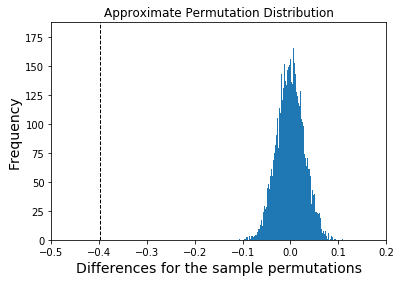

In [149]:
plt.hist(list,bins=200)
plt.axvline( np.mean(ncaPrice)-np.mean(caPrice),color='k', linestyle='dashed', linewidth=1)
plt.xlim(-0.5,0.2)
plt.xlabel('Differences for the sample permutations',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.title('Approximate Permutation Distribution');
